## **EEG Spectral Analysis - Preprocessing**

In [1]:
# Import the library to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#Apply ggplot style
import matplotlib as mpl

#Import the style
mpl.style.use('ggplot')

In [3]:
#Indicate the path where the data is
filepath = '/content/drive/My Drive/Emotiv Research/Mexico/Preprocessed Data'

In [4]:
#Indicate the files per emotion group

# EEG files from exposition to set of Practice 2
eegfiles_p2 = ['/P01/P01_P2.csv','/P02/P02_P2.csv','/P03/P03_P2.csv','/P04/P04_P2.csv','/P05/P05_P2.csv',
                 '/P06/P06_P2.csv','/P07/P07_P2.csv','/P08/P08_P2.csv','/P09/P09_P2.csv','/P11/P11_P2.csv',
                 '/P12/P12_P2.csv','/P13/P13_P2.csv','/P14/P14_P2.csv','/P16/P16_P2.csv','/P17/P17_P2.csv',
                 '/P18/P18_P2.csv','/P19/P19_P2.csv','/P21/P21_P2.csv','/P22/P22_P2.csv','/P23/P23_P2.csv',
                 '/P24/P24_P2.csv','/P26/P26_P2.csv','/P27/P27_P2.csv','/P28/P28_P2.csv','/P29/P29_P2.csv',
                 '/P31/P31_P2.csv','/P32/P32_P2.csv','/P33/P33_P2.csv','/P34/P34_P2.csv','/P36/P36_P2.csv',
                 '/P37/P37_P2.csv','/P38/P38_P2.csv','/P39/P39_P2.csv'
                 ]

# EEG files from exposition to set of Test 1
eegfiles_t1 = ['/P01/P01_T1.csv','/P02/P02_T1.csv','/P03/P03_T1.csv','/P04/P04_T1.csv','/P05/P05_T1.csv',
                 '/P06/P06_T1.csv','/P07/P07_T1.csv','/P08/P08_T1.csv','/P09/P09_T1.csv','/P11/P11_T1.csv',
                 '/P12/P12_T1.csv','/P13/P13_T1.csv','/P14/P14_T1.csv','/P16/P16_T1.csv','/P17/P17_T1.csv',
                 '/P18/P18_T1.csv','/P19/P19_T1.csv','/P21/P21_T1.csv','/P22/P22_T1.csv','/P23/P23_T1.csv',
                 '/P24/P24_T1.csv','/P26/P26_T1.csv','/P27/P27_T1.csv','/P28/P28_T1.csv','/P29/P29_T1.csv',
                 '/P31/P31_T1.csv','/P32/P32_T1.csv','/P33/P33_T1.csv','/P34/P34_T1.csv','/P36/P36_T1.csv',
                 '/P37/P37_T1.csv','/P38/P38_T1.csv','/P39/P39_T1.csv'
                 ]

# EEG files from exposition to set of Test 2
eegfiles_t2 = ['/P01/P01_T2.csv','/P02/P02_T2.csv','/P03/P03_T2.csv','/P04/P04_T2.csv','/P05/P05_T2.csv',
                 '/P06/P06_T2.csv','/P07/P07_T2.csv','/P08/P08_T2.csv','/P09/P09_T2.csv','/P11/P11_T2.csv',
                 '/P12/P12_T2.csv','/P13/P13_T2.csv','/P14/P14_T2.csv','/P16/P16_T2.csv','/P17/P17_T2.csv',
                 '/P18/P18_T2.csv','/P19/P19_T2.csv','/P21/P21_T2.csv','/P22/P22_T2.csv','/P23/P23_T2.csv',
                 '/P24/P24_T2.csv','/P26/P26_T2.csv','/P27/P27_T2.csv','/P28/P28_T2.csv','/P29/P29_T2.csv',
                 '/P31/P31_T2.csv','/P32/P32_T2.csv','/P33/P33_T2.csv','/P34/P34_T2.csv','/P36/P36_T2.csv',
                 '/P37/P37_T2.csv','/P38/P38_T2.csv','/P39/P39_T2.csv'
                 ]

# EEG files from exposition to set of Test 3
eegfiles_t3 = ['/P01/P01_T3.csv','/P02/P02_T3.csv','/P03/P03_T3.csv','/P04/P04_T3.csv','/P05/P05_T3.csv',
                 '/P06/P06_T3.csv','/P07/P07_T3.csv','/P08/P08_T3.csv','/P09/P09_T3.csv','/P11/P11_T3.csv',
                 '/P12/P12_T3.csv','/P13/P13_T3.csv','/P14/P14_T3.csv','/P16/P16_T3.csv','/P17/P17_T3.csv',
                 '/P18/P18_T3.csv','/P19/P19_T3.csv','/P21/P21_T3.csv','/P22/P22_T3.csv','/P23/P23_T3.csv',
                 '/P24/P24_T3.csv','/P26/P26_T3.csv','/P27/P27_T3.csv','/P28/P28_T3.csv','/P29/P29_T3.csv',
                 '/P31/P31_T3.csv','/P32/P32_T3.csv','/P33/P33_T3.csv','/P34/P34_T3.csv','/P36/P36_T3.csv',
                 '/P37/P37_T3.csv','/P38/P38_T3.csv','/P39/P39_T3.csv'
                 ]

# EEG files from exposition to set of Test 4
eegfiles_t4 = ['/P01/P01_T4.csv','/P02/P02_T4.csv','/P03/P03_T4.csv','/P04/P04_T4.csv','/P05/P05_T4.csv',
                 '/P06/P06_T4.csv','/P07/P07_T4.csv','/P08/P08_T4.csv','/P09/P09_T4.csv','/P11/P11_T4.csv',
                 '/P12/P12_T4.csv','/P13/P13_T4.csv','/P14/P14_T4.csv','/P16/P16_T4.csv','/P17/P17_T4.csv',
                 '/P18/P18_T4.csv','/P19/P19_T4.csv','/P21/P21_T4.csv','/P22/P22_T4.csv','/P23/P23_T4.csv',
                 '/P24/P24_T4.csv','/P26/P26_T4.csv','/P27/P27_T4.csv','/P28/P28_T4.csv','/P29/P29_T4.csv',
                 '/P31/P31_T4.csv','/P32/P32_T4.csv','/P33/P33_T4.csv','/P34/P34_T4.csv','/P36/P36_T4.csv',
                 '/P37/P37_T4.csv','/P38/P38_T4.csv','/P39/P39_T4.csv'
                 ]

# EEG files from exposition to set of Test 5
eegfiles_t5 = ['/P01/P01_T5.csv','/P02/P02_T5.csv','/P03/P03_T5.csv','/P04/P04_T5.csv','/P05/P05_T5.csv',
                 '/P06/P06_T5.csv','/P07/P07_T5.csv','/P08/P08_T5.csv','/P09/P09_T5.csv','/P11/P11_T5.csv',
                 '/P12/P12_T5.csv','/P13/P13_T5.csv','/P14/P14_T5.csv','/P16/P16_T5.csv','/P17/P17_T5.csv',
                 '/P18/P18_T5.csv','/P19/P19_T5.csv','/P21/P21_T5.csv','/P22/P22_T5.csv','/P23/P23_T5.csv',
                 '/P24/P24_T5.csv','/P26/P26_T5.csv','/P27/P27_T5.csv','/P28/P28_T5.csv','/P29/P29_T5.csv',
                 '/P31/P31_T5.csv','/P32/P32_T5.csv','/P33/P33_T5.csv','/P34/P34_T5.csv','/P36/P36_T5.csv',
                 '/P37/P37_T5.csv','/P38/P38_T5.csv','/P39/P39_T5.csv'
                 ]

In [5]:
# Save cleaned data per test
p2 = []
t1 = []
t2 = []
t3 = []
t4 = []
t5 = []

for subject_file in eegfiles_p2:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    p2.append(cleaned_data)


for subject_file in eegfiles_t1:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    t1.append(cleaned_data)


for subject_file in eegfiles_t2:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    t2.append(cleaned_data)


for subject_file in eegfiles_t3:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    t3.append(cleaned_data)


for subject_file in eegfiles_t4:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    t4.append(cleaned_data)


for subject_file in eegfiles_t5:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of the test
    filtered_data = data[77:]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    t5.append(cleaned_data)

In [6]:
subjects = []

for subject in p2:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_p2 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Practice 2 into a csv file
df_p2.to_csv('p2_spectral_data.csv', index=False)

In [7]:
subjects = []

for subject in t1:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_t1 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Test 1 into a csv file
df_t1.to_csv('t1_spectral_data.csv', index=False)

In [8]:
subjects = []

for subject in t2:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_t2 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Test 2 into a csv file
df_t2.to_csv('t2_spectral_data.csv', index=False)

In [9]:
subjects = []

for subject in t3:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_t3 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Test 3 into a csv file
df_t3.to_csv('t3_spectral_data.csv', index=False)

In [10]:
subjects = []

for subject in t4:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_t4 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Test 3 into a csv file
df_t4.to_csv('t4_spectral_data.csv', index=False)

In [11]:
subjects = []

for subject in t5:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_t5 = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from Test 3 into a csv file
df_t5.to_csv('t5_spectral_data.csv', index=False)

### **Statistical Analysis per Group Emotion per Channel**

In [12]:
# Basic descriptive statistics
df_p2.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.632523,5.816616,3.947829,5.392244,3.418981,4.659339,1.380842,4.499701,1.581068,4.591843,...,-9.397651,1.480602,-10.496778,1.325461,-7.911159,1.404488,-8.213938,1.494043,-10.729689,1.256159
std,3.904650,1.565089,4.240284,1.789521,3.704630,1.524483,3.045481,1.429947,4.375892,1.555215,...,2.995176,0.543441,2.527734,0.286489,2.606328,0.442827,2.606323,0.428836,1.782334,0.223295
min,-3.391824,3.022604,-2.519902,0.884488,-4.893486,1.413401,-3.260392,0.769631,-5.902131,0.730074,...,-13.717119,0.808974,-14.122712,0.880857,-12.727570,0.849851,-13.699638,0.447168,-13.043828,0.663901
25%,1.586751,4.578826,0.772177,4.209641,1.721967,3.546325,-0.317320,3.793519,-1.141335,4.063288,...,-11.811899,1.156893,-11.766351,1.122020,-9.202811,1.142363,-9.845916,1.177992,-11.710872,1.173509
50%,3.497041,6.047454,3.648064,5.442873,3.053950,4.797887,1.211561,4.487518,0.958552,4.828979,...,-10.040935,1.330866,-11.187695,1.338437,-7.723798,1.344208,-8.368105,1.646196,-11.117462,1.276950
75%,7.221105,6.687015,6.203895,6.480979,5.087010,5.782143,2.936436,5.206590,3.407213,5.335094,...,-6.781174,1.733361,-9.610621,1.416141,-6.415534,1.469100,-6.422761,1.819167,-10.348275,1.358696
max,9.041049,8.389529,15.284139,8.410619,11.480084,6.693551,6.912427,6.997600,12.198911,6.891059,...,-3.805516,3.209035,-4.621677,1.933350,-2.469132,2.875247,-3.986851,2.105185,-6.059222,1.595097


In [13]:
# Basic descriptive statistics
df_t1.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.181095,6.595910,1.124449,6.249027,1.140417,4.626001,-0.040485,5.066992,-0.027462,4.907383,...,-10.352426,1.350685,-11.418368,1.184385,-8.156819,1.290481,-8.936120,1.399729,-10.792568,1.137631
std,2.885066,1.597372,2.233441,1.642452,2.756000,0.871484,2.444472,1.111152,2.341404,1.406506,...,3.048411,0.365767,2.428852,0.183213,2.468711,0.413908,3.000738,0.447854,2.269223,0.206377
min,-1.590246,3.532225,-3.433056,3.665079,-4.874958,2.845696,-3.896127,3.177465,-4.568346,2.020698,...,-14.759662,0.976224,-15.479422,0.929230,-12.851354,0.738735,-13.920143,0.697645,-13.863118,0.483717
25%,0.012167,5.841930,-0.223729,4.845717,0.136495,4.162732,-1.366066,4.281712,-1.479390,4.005754,...,-12.334646,1.110400,-12.939353,1.040765,-9.380576,1.018266,-10.788822,1.087026,-12.133534,1.089632
50%,1.924228,6.500283,1.216531,6.631816,0.851402,4.668701,-0.024416,5.129210,0.592935,4.755469,...,-11.592012,1.289041,-11.698051,1.176221,-7.903387,1.206072,-8.661505,1.295917,-11.090280,1.172965
75%,2.469687,7.814998,2.524622,7.310352,2.909366,5.209504,1.519430,6.001174,1.686365,5.929524,...,-8.922731,1.438071,-10.670097,1.243445,-6.992536,1.410590,-7.372468,1.628768,-10.630534,1.233431
max,9.822943,9.914644,6.622421,10.117624,6.150704,6.084904,4.119041,6.524482,2.819411,8.140503,...,-2.947227,2.612169,-4.352398,1.567325,-4.180837,2.526809,-4.124699,2.423865,-5.452817,1.479762


In [14]:
# Basic descriptive statistics
df_t2.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.748918,6.066957,2.066344,5.584170,1.186561,4.662233,-0.352693,4.815944,-0.207580,4.425122,...,-9.932458,1.482261,-11.294455,1.287865,-8.309489,1.329199,-9.346444,1.694512,-11.136170,1.355289
std,3.750110,1.549429,3.098959,1.858206,3.605115,1.444447,2.888163,1.574071,2.895967,1.132515,...,3.137904,0.339338,2.402196,0.309765,3.279791,0.418816,2.518277,0.664820,2.471625,0.348642
min,-2.514974,2.950188,-4.558679,0.489087,-6.233517,0.246446,-8.493332,0.236094,-7.372125,0.949158,...,-14.059938,0.939596,-13.881354,0.376277,-13.947421,0.353133,-13.545084,0.916462,-13.981027,0.826896
25%,0.013289,5.111269,0.013675,4.492372,-0.816947,3.832171,-2.185367,3.788127,-2.042249,3.969581,...,-12.704682,1.273117,-12.689096,1.124570,-10.489669,1.148398,-10.867511,1.293346,-12.750471,1.121035
50%,1.995101,5.922688,2.436906,5.609419,0.712473,4.798953,-0.155691,4.863748,0.233706,4.305584,...,-11.379579,1.438314,-12.120982,1.233387,-7.964992,1.255963,-9.432514,1.539306,-12.168996,1.348518
75%,4.950309,7.402523,4.137908,6.887605,3.598822,5.847976,1.044285,6.200004,1.585877,4.906002,...,-6.605512,1.524543,-10.642151,1.513573,-6.306857,1.500324,-7.788203,1.919297,-10.453705,1.492158
max,9.420613,9.024770,7.006241,9.077711,7.556466,6.809200,5.061204,6.970708,3.923306,6.566078,...,-4.407131,2.331791,-3.428907,1.830858,-1.923984,2.352610,-4.539848,3.451552,-4.244251,2.365236


In [15]:
# Basic descriptive statistics
df_t3.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.997523,5.738175,1.523378,5.870988,0.647760,4.761768,-0.328921,4.903909,0.100394,4.654375,...,-10.013219,1.613257,-11.393642,1.277792,-9.225893,1.423900,-9.499386,1.717277,-10.686690,1.354106
std,3.411694,1.416925,2.736471,1.455894,3.249513,1.275795,3.617083,1.375261,3.775826,1.121070,...,3.622021,0.560117,2.522287,0.264717,2.987412,0.557202,2.885183,0.686523,2.589063,0.372295
min,-4.706762,3.455617,-3.614331,4.168322,-5.258822,2.766175,-6.565864,2.481035,-4.780725,2.752593,...,-14.936487,1.084861,-14.318286,0.695605,-13.708673,0.565681,-14.631413,1.107599,-14.028250,0.869302
25%,-0.459080,4.862939,0.427539,4.633251,-0.152881,3.938972,-2.257457,3.875728,-2.164528,3.697450,...,-12.279125,1.237386,-12.713499,1.119349,-11.102116,1.126584,-11.462057,1.292287,-12.484132,1.156182
50%,2.709808,5.238722,1.472598,5.574485,0.954690,4.484421,-0.563764,4.859545,-0.590783,4.748558,...,-11.608747,1.406534,-12.056125,1.281962,-9.168893,1.297534,-9.505644,1.456787,-11.649979,1.273110
75%,4.112013,6.380847,3.294528,6.660964,2.657240,5.586088,1.169170,5.987790,1.953503,5.510875,...,-6.961423,1.910386,-10.747600,1.414540,-7.203780,1.565189,-7.534440,1.894520,-9.313222,1.358903
max,8.907483,9.378329,7.343065,9.172276,6.752015,7.158965,8.698562,8.228988,10.772618,6.787965,...,-2.520713,3.322665,-2.875281,1.799331,-4.174287,3.161708,-4.944888,3.684654,-5.008414,2.545425


In [16]:
# Basic descriptive statistics
df_t4.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.152495,6.184262,1.903707,5.781800,1.346336,5.011622,-0.254401,5.035505,-0.047947,4.589627,...,-11.170803,1.448354,-11.778134,1.218313,-8.587233,1.447104,-10.640727,1.583934,-11.147197,1.301210
std,3.968972,1.437326,3.095318,1.410878,3.164228,1.191276,2.690708,1.320666,2.996739,0.976661,...,2.933554,0.305378,2.543102,0.200417,3.157171,0.577703,2.770787,0.564206,2.269101,0.223722
min,-3.688366,4.331394,-3.547032,3.785935,-5.037447,3.005027,-4.784520,3.172987,-5.395905,3.384079,...,-14.683750,0.999098,-14.681835,0.820894,-12.750794,0.829680,-14.146032,0.976438,-13.948852,0.969516
25%,-0.250374,5.069316,-0.929070,4.600027,0.452556,3.938122,-2.190597,4.119275,-1.610191,3.834514,...,-13.075018,1.265928,-13.195130,1.104015,-11.222655,1.160883,-12.452873,1.239409,-12.712034,1.179674
50%,3.917453,5.700913,2.611278,5.534409,1.413827,5.041514,0.213868,4.583059,-0.318492,4.115228,...,-12.470125,1.350304,-12.116111,1.197876,-9.070614,1.234645,-11.582480,1.444514,-11.453739,1.229835
75%,6.021486,7.334591,4.176216,6.708612,2.940451,5.994453,1.119103,6.285006,2.434247,5.409127,...,-9.263130,1.593368,-10.797099,1.325809,-6.430868,1.392963,-8.924538,1.734519,-10.364474,1.487648
max,10.783030,9.180196,6.301398,8.708484,6.292600,6.988293,5.271901,7.941783,5.187597,6.842035,...,-3.149955,2.294792,-2.934930,1.601916,-1.781745,3.138855,-4.884902,3.317169,-5.761806,1.789463


In [17]:
# Basic descriptive statistics
df_t5.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.393574,6.498220,1.558004,6.407087,0.554591,5.022638,-0.155698,5.321841,0.428008,5.230567,...,-10.772939,1.437002,-11.869034,1.270205,-9.187411,1.421220,-10.065814,1.602011,-10.900366,1.272059
std,3.459745,1.467216,2.959479,1.702965,2.712400,1.335376,3.568089,1.489591,3.893749,0.950122,...,2.450354,0.277686,1.902097,0.272729,2.847855,0.617918,3.192868,0.667992,2.297294,0.192616
min,-2.552355,4.104204,-4.455839,4.007763,-5.371421,2.996231,-4.638226,2.658247,-6.095297,3.637343,...,-13.933798,1.140731,-14.257102,0.888611,-13.628219,0.579828,-14.187362,1.031429,-14.093776,1.029780
25%,-1.291043,5.321597,-0.662671,5.206531,0.290438,4.138772,-2.662147,4.292301,-2.979364,4.647760,...,-12.583917,1.249251,-13.113567,1.132433,-11.852662,1.103026,-12.077041,1.146329,-12.398681,1.141273
50%,3.655259,6.236077,1.987285,6.027394,1.158585,4.628839,-0.169133,5.045583,0.502678,5.017860,...,-10.922340,1.395309,-12.447026,1.179992,-8.143944,1.223421,-10.650886,1.319652,-11.552766,1.208696
75%,5.289803,7.668252,3.116819,7.711189,2.480150,6.308202,1.500265,6.221237,2.893302,5.922332,...,-9.398657,1.558843,-10.560408,1.349356,-7.087564,1.663557,-8.076220,1.796097,-9.362464,1.453110
max,7.878829,8.764397,7.196640,10.752514,4.125448,7.369576,10.808279,8.368216,9.005177,6.856827,...,-6.185308,2.242648,-7.891104,1.904549,-5.074732,3.070911,-2.326140,3.313832,-5.582143,1.581232


### **General Spectral Power Analysis**

In [18]:
subjects = []

for subject in p2:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_p2_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Practice 2 into a csv file
df_p2_overall.to_csv('p2_spectral_data_overall.csv', index=False)

In [19]:
subjects = []

for subject in t1:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_t1_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Test 1 into a csv file
df_t1_overall.to_csv('t1_spectral_data_overall.csv', index=False)

In [20]:
subjects = []

for subject in t2:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_t2_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Test 2 into a csv file
df_t2_overall.to_csv('t2_spectral_data_overall.csv', index=False)

In [21]:
subjects = []

for subject in t3:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_t3_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Test 3 into a csv file
df_t3_overall.to_csv('t3_spectral_data_overall.csv', index=False)

In [22]:
subjects = []

for subject in t4:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_t4_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Test 3 into a csv file
df_t4_overall.to_csv('t4_spectral_data_overall.csv', index=False)

In [23]:
subjects = []

for subject in t5:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_t5_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from Test 3 into a csv file
df_t5_overall.to_csv('t5_spectral_data_overall.csv', index=False)

In [24]:
df_p2_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']]

,mean_delta,mean_theta,mean_alpha,mean_beta,mean_gamma
0,7.772697,10.699899,3.920416,-3.814092,-8.809134
1,2.781715,4.289322,-0.602464,-2.064273,-7.261729
2,3.581052,5.237996,-0.347521,-3.912956,-9.433752
3,6.229125,4.901641,-1.636953,-4.743869,-9.322916
4,1.174292,4.406690,-0.928599,-5.762565,-11.973232
5,0.440451,3.266418,-0.780262,-5.556485,-10.171249
6,NaN,NaN,NaN,NaN,NaN
7,0.661365,4.249957,-0.620463,-5.848206,-12.002678
8,NaN,NaN,NaN,NaN,NaN
9,3.265692,5.306319,0.370368,-4.320619,-9.595453


<ipython-input-25-fee4ba071e9a>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_p2_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


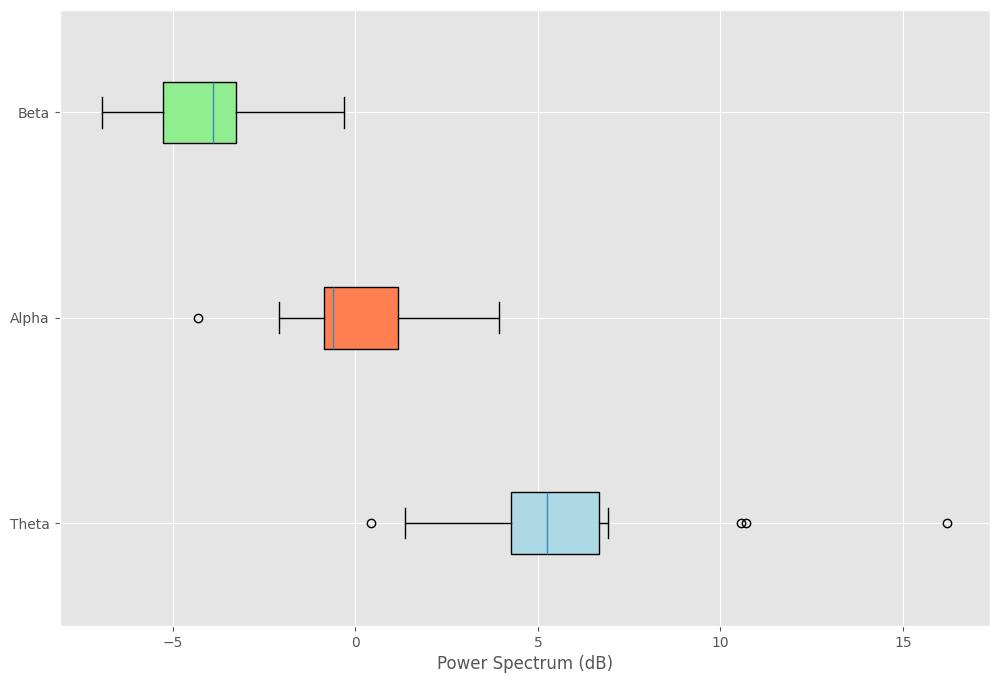

In [25]:
# 4. Plot the Box Plot for all bands for Practice 2
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_p2_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-26-2401b57d23e0>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_t1_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


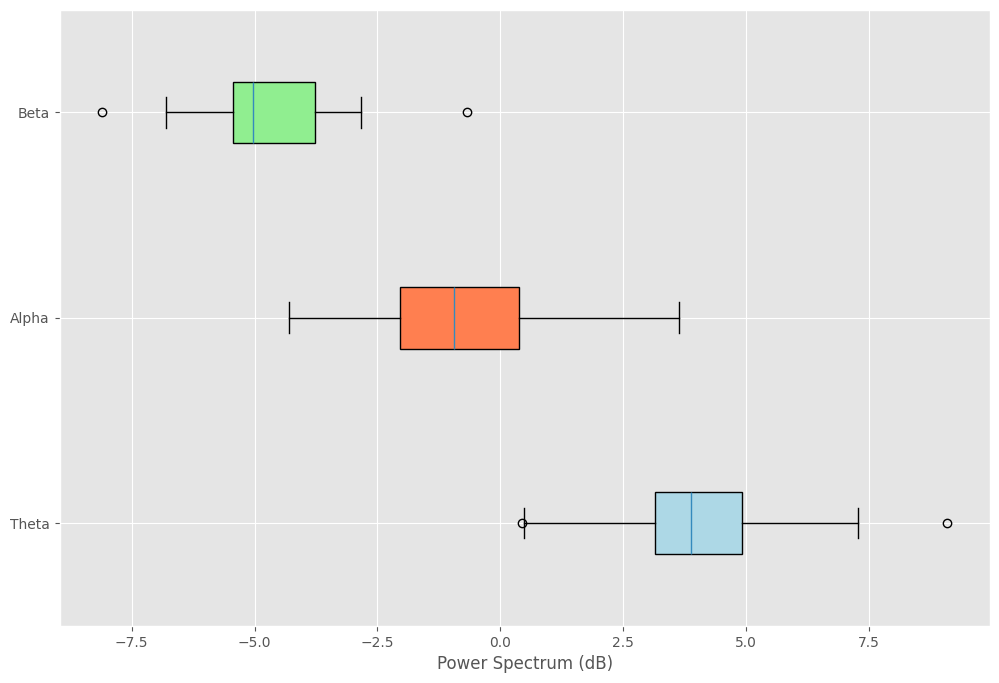

In [26]:
# 4. Plot the Box Plot for all bands for Test 1
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_t1_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-27-b9e71d9f65d6>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_t2_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


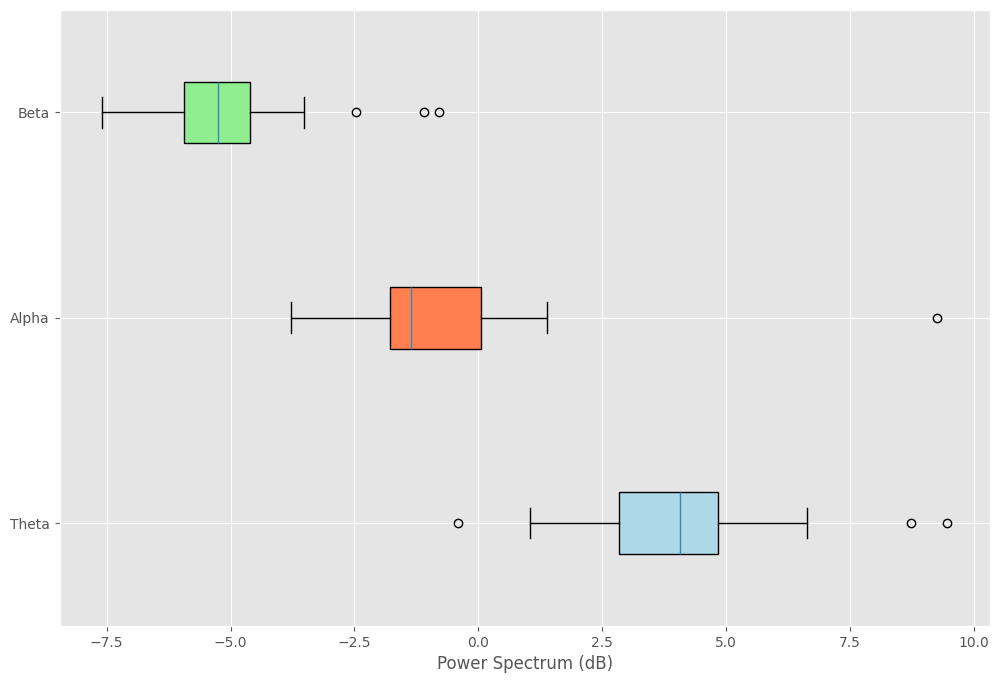

In [27]:
# 4. Plot the Box Plot for all bands for Test 2
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_t2_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-28-9a713765ad9e>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_t3_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


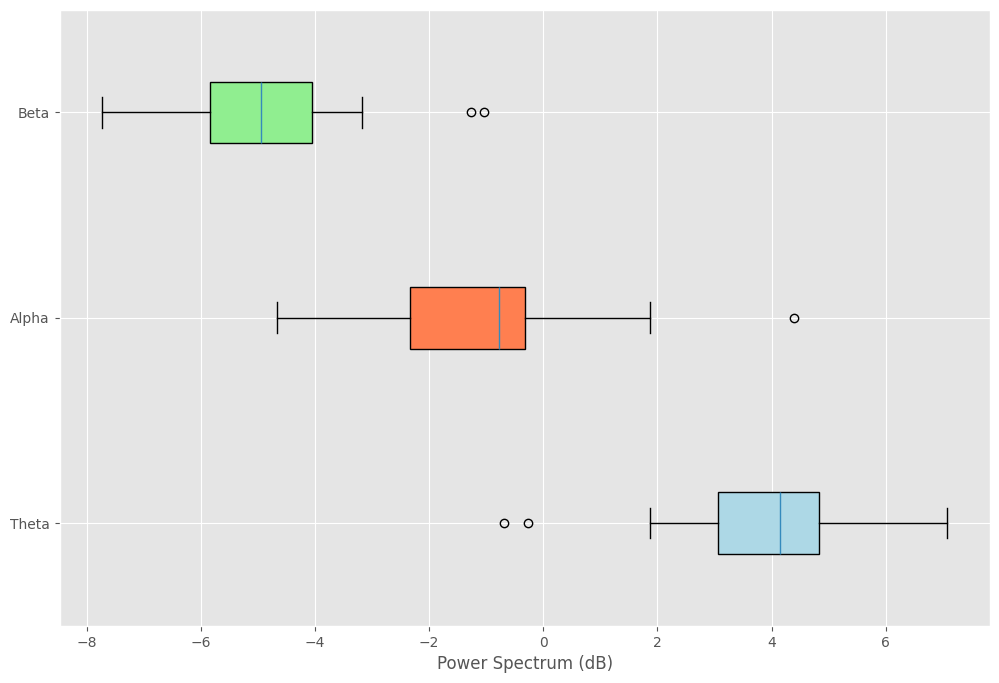

In [28]:
# 4. Plot the Box Plot for all bands for Test 3
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_t3_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-29-8c7eb4ae2b75>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_t4_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


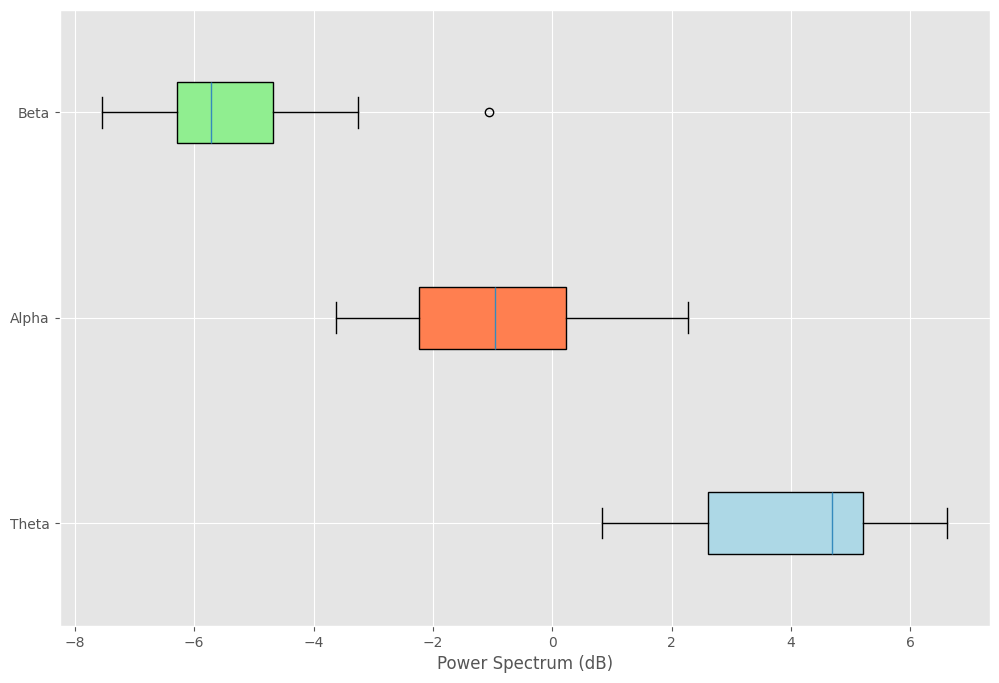

In [29]:
# 4. Plot the Box Plot for all bands for Test 4
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_t4_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-30-4a135c3d2a87>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_t5_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),


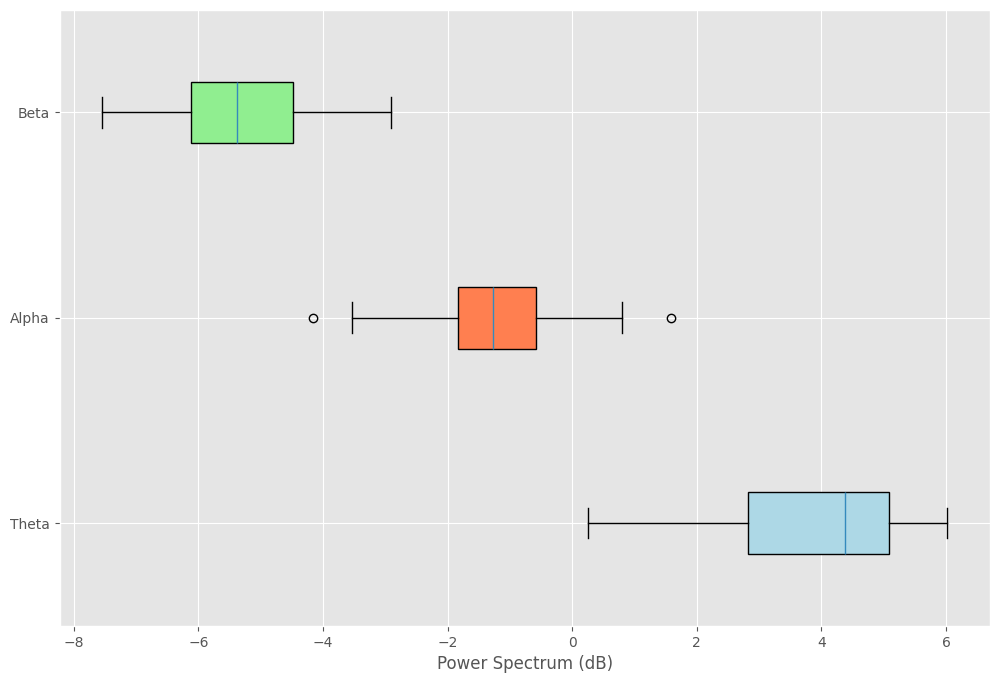

In [30]:
# 4. Plot the Box Plot for all bands for Test 5
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_t5_overall[['mean_theta', 'mean_alpha', 'mean_beta']].dropna(),
                     patch_artist=True, vert=False, labels=['Theta', 'Alpha', 'Beta'])

colors = ['lightblue', 'coral', 'lightgreen']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

## **Valence and Arousal from EEG**

In [31]:
# Create scaler object for normalization
scaler = MinMaxScaler()

In [32]:
subjects = []

for subject in t2:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_t2_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_t2_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1            NaN          NaN           NaN          NaN
2       1.943959     1.819875      9.245810    28.313597
3            NaN          NaN           NaN          NaN
4       3.737870     2.129445      3.406249    24.361564
5       0.121967     2.015777      1.755223    19.757428
6      -1.880438     1.750263     -0.132971     0.073015
7      -1.066708     2.192027     98.642153   994.966280
8            NaN          NaN           NaN          NaN
9      -0.733153     1.910807     -4.485483    41.709706
10           NaN          NaN           NaN          NaN
11     -0.244356     2.731450      2.714123    14.013745
12           NaN          NaN           NaN          NaN
13     -5.503240     0.213722      0.029019     0.116811
14     -2.439108     2.724741      1.102328    12.104465
15     -1.052759     2.157944     30.490455   261.433667
16     -0.015471     2.550946  

In [33]:
# Transform the results to a [0-1] scale
normalized_t2 = pd.DataFrame(scaler.fit_transform(df_t2_valece_arousal), columns=df_t2_valece_arousal.columns)

print(normalized_t2)

    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1            NaN          NaN           NaN          NaN
2       0.805877     0.628037      0.193395     0.028386
3            NaN          NaN           NaN          NaN
4       1.000000     0.749085      0.140706     0.024413
5       0.608715     0.704639      0.125809     0.019785
6       0.392031     0.600818      0.108773     0.000000
7       0.480086     0.773556      1.000000     1.000000
8            NaN          NaN           NaN          NaN
9       0.516181     0.663594      0.069501     0.041850
10           NaN          NaN           NaN          NaN
11      0.569075     0.984481      0.134461     0.014012
12           NaN          NaN           NaN          NaN
13      0.000000     0.000000      0.110234     0.000044
14      0.331576     0.981858      0.119918     0.012093
15      0.481596     0.760229      0.385081     0.262702
16      0.593843     0.913901  

In [34]:
subjects = []

for subject in t3:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_t3_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_t3_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1       0.279008     1.931128     -0.036270    11.841954
2            NaN          NaN           NaN          NaN
3       0.180611     2.286625      1.915190     1.987877
4       2.221261     2.671310     -4.242814    35.591338
5      -0.198842     1.612435      4.056992    51.290361
6            NaN          NaN           NaN          NaN
7      -1.852668     2.276337      3.322141    10.446754
8            NaN          NaN           NaN          NaN
9      -0.275351     2.022353    -10.657510    95.502725
10     -0.373956     2.447386     -0.857816     8.896507
11     -0.435634     2.795130      2.509157     5.964621
12           NaN          NaN           NaN          NaN
13     -0.735623     2.531167      3.466427    46.592035
14     -3.048280     3.948064      5.553207    61.250840
15           NaN          NaN           NaN          NaN
16      2.319489     3.878917  

In [35]:
# Transform the results to a [0-1] scale
normalized_t3 = pd.DataFrame(scaler.fit_transform(df_t3_valece_arousal), columns=df_t3_valece_arousal.columns)

print(normalized_t3)

    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1       0.619864     0.136448      0.655199     0.105374
2            NaN          NaN           NaN          NaN
3       0.601533     0.288655      0.775579     0.000000
4       0.981700     0.453358      0.395707     0.359338
5       0.530842     0.000000      0.907702     0.527216
6            NaN          NaN           NaN          NaN
7       0.222739     0.284250      0.862371     0.090455
8            NaN          NaN           NaN          NaN
9       0.516589     0.175506      0.000000     1.000000
10      0.498219     0.357484      0.604519     0.073877
11      0.486729     0.506371      0.812220     0.042525
12           NaN          NaN           NaN          NaN
13      0.430841     0.393355      0.871272     0.476974
14      0.000000     1.000000      1.000000     0.633728
15           NaN          NaN           NaN          NaN
16      1.000000     0.970395  

In [36]:
subjects = []

for subject in t4:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_t4_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_t4_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0       1.255353     3.110420      1.067596     8.931830
1       0.399025     1.741871     -4.146022    30.031534
2            NaN          NaN           NaN          NaN
3      -0.647414     2.096054     -2.878988    45.438014
4       3.605122     2.217028    -10.416008   134.455304
5       0.078817     2.163491      1.301029    16.395110
6            NaN          NaN           NaN          NaN
7      -2.054234     1.821481      2.794302    17.600071
8            NaN          NaN           NaN          NaN
9      -0.675572     2.012729     -2.316209    19.883397
10           NaN          NaN           NaN          NaN
11     -0.685496     2.819166      3.848086    10.570041
12           NaN          NaN           NaN          NaN
13     -1.711148     2.519290      4.131640    38.927910
14     -1.839550     2.973772      0.771269     7.895570
15      0.066088     2.390780     -0.638636     4.765173
16           NaN          NaN  

In [37]:
# Transform the results to a [0-1] scale
normalized_t4 = pd.DataFrame(scaler.fit_transform(df_t4_valece_arousal), columns=df_t4_valece_arousal.columns)

print(normalized_t4)

    mean_valence  std_valence  mean_arousal  std_arousal
0       0.584799     0.985006      0.739823     0.031439
1       0.433487     0.187229      0.439566     0.190642
2            NaN          NaN           NaN          NaN
3       0.248583     0.393695      0.512536     0.306888
4       1.000000     0.464216      0.078471     0.978549
5       0.376907     0.433007      0.753267     0.087751
6            NaN          NaN           NaN          NaN
7       0.000000     0.233637      0.839266     0.096843
8            NaN          NaN           NaN          NaN
9       0.243608     0.345122      0.544947     0.114071
10           NaN          NaN           NaN          NaN
11      0.241854     0.815224      0.899954     0.043799
12           NaN          NaN           NaN          NaN
13      0.060623     0.640415      0.916285     0.257768
14      0.037934     0.905349      0.722757     0.023620
15      0.374658     0.565502      0.641560     0.000000
16           NaN          NaN  

In [38]:
subjects = []

for subject in t5:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_t5_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_t5_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0       2.669530     3.627792     -0.568030    32.709802
1            NaN          NaN           NaN          NaN
2            NaN          NaN           NaN          NaN
3      -0.379369     1.822212     16.536693    72.379571
4       3.854128     2.556232    488.744776  4988.478839
5      -0.583478     2.267369     -1.877499    22.638853
6            NaN          NaN           NaN          NaN
7      -1.082975     2.079760     -1.304844    43.580585
8            NaN          NaN           NaN          NaN
9      -0.337816     1.959742     -0.657192    26.754469
10           NaN          NaN           NaN          NaN
11     -0.274372     2.130305     -0.068908    22.910257
12           NaN          NaN           NaN          NaN
13           NaN          NaN           NaN          NaN
14     -1.773212     2.718011     -0.134631     5.541916
15     -0.609259     3.465917      1.071757     6.211950
16           NaN          NaN  

In [39]:
# Transform the results to a [0-1] scale
normalized_t5 = pd.DataFrame(scaler.fit_transform(df_t5_valece_arousal), columns=df_t5_valece_arousal.columns)

print(normalized_t5)

    mean_valence  std_valence  mean_arousal  std_arousal
0       0.795965     1.000000      0.002669     0.005965
1            NaN          NaN           NaN          NaN
2            NaN          NaN           NaN          NaN
3       0.270822     0.000000      0.037532     0.013922
4       1.000000     0.406528      1.000000     1.000000
5       0.235666     0.246545      0.000000     0.003945
6            NaN          NaN           NaN          NaN
7       0.149633     0.142640      0.001167     0.008146
8            NaN          NaN           NaN          NaN
9       0.277979     0.076170      0.002487     0.004771
10           NaN          NaN           NaN          NaN
11      0.288906     0.170634      0.003686     0.003999
12           NaN          NaN           NaN          NaN
13           NaN          NaN           NaN          NaN
14      0.030746     0.496128      0.003552     0.000516
15      0.231226     0.910347      0.006011     0.000650
16           NaN          NaN  

In [40]:
# Import file where manekin results are
file_results = '/content/drive/My Drive/Emotiv Research/Mexico/Analysis/test_results.xlsx'
df_manekins = pd.read_excel(file_results)
df_manekins = df_manekins[['Mk_hh_valence','Mk_hh_arousal','Mk_lh_valence','Mk_lh_arousal','Mk_hl_valence','Mk_hl_arousal','Mk_ll_valence','Mk_ll_arousal']]
df_manekins = df_manekins.iloc[:-2]
df_manekins

,Mk_hh_valence,Mk_hh_arousal,Mk_lh_valence,Mk_lh_arousal,Mk_hl_valence,Mk_hl_arousal,Mk_ll_valence,Mk_ll_arousal
0,4,1,2,4,3,1,5,1
1,4,3,2,4,4,1,3,2
2,5,4,1,4,5,2,2,3
3,4,4,2,2,4,2,3,3
4,4,2,2,5,4,4,3,3
5,5,4,2,4,5,1,3,2
6,5,2,2,4,5,1,2,3
7,5,3,1,5,5,3,2,3
8,4,3,2,4,4,3,2,3
9,4,2,2,3,5,1,3,2


In [41]:
# Transform the results to a [0-1] scale
normalized_mk = pd.DataFrame(scaler.fit_transform(df_manekins), columns=df_manekins.columns)

print(normalized_mk)

    Mk_hh_valence  Mk_hh_arousal  Mk_lh_valence  Mk_lh_arousal  Mk_hl_valence  \
0             0.5           0.00            0.5       0.666667            0.0   
1             0.5           0.50            0.5       0.666667            0.5   
2             1.0           0.75            0.0       0.666667            1.0   
3             0.5           0.75            0.5       0.000000            0.5   
4             0.5           0.25            0.5       1.000000            0.5   
5             1.0           0.75            0.5       0.666667            1.0   
6             1.0           0.25            0.5       0.666667            1.0   
7             1.0           0.50            0.0       1.000000            1.0   
8             0.5           0.50            0.5       0.666667            0.5   
9             0.5           0.25            0.5       0.333333            1.0   
10            0.5           0.75            0.0       0.666667            1.0   
11            1.0           

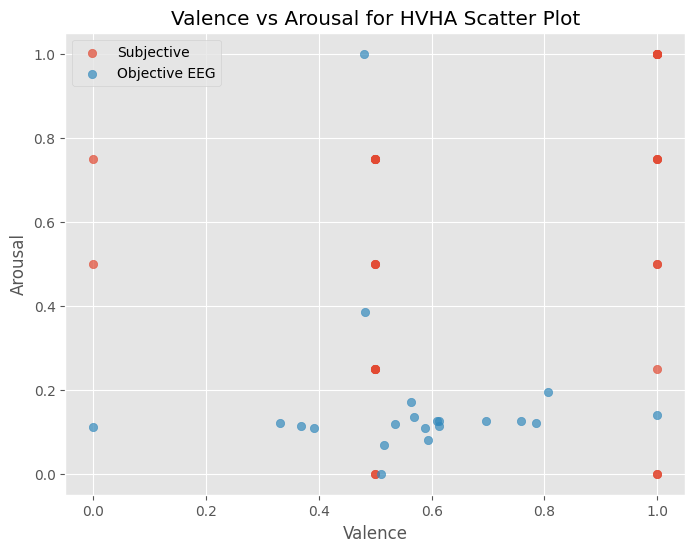

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_hh_valence'], normalized_mk['Mk_hh_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_t2['mean_valence'], normalized_t2['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for HVHA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

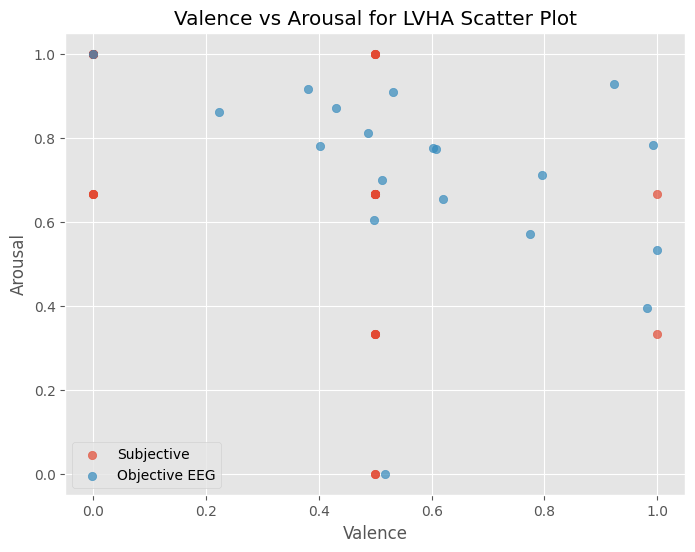

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_lh_valence'], normalized_mk['Mk_lh_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_t3['mean_valence'], normalized_t3['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for LVHA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

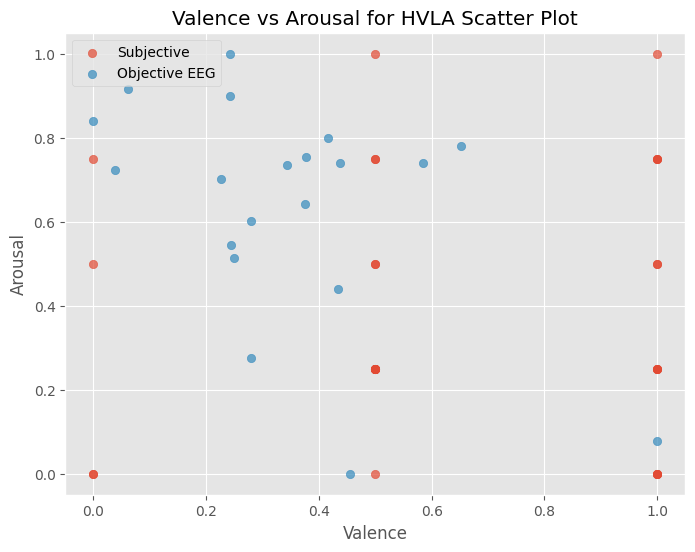

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_hl_valence'], normalized_mk['Mk_hl_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_t4['mean_valence'], normalized_t4['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for HVLA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

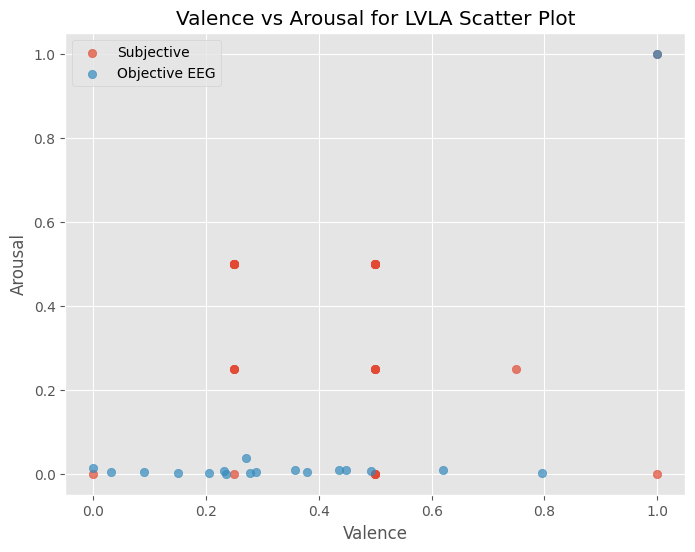

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_ll_valence'], normalized_mk['Mk_ll_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_t5['mean_valence'], normalized_t5['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for LVLA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Transform the results to a [0-1] scale, considering the original likert scale 1-5 limits
normalized2_mk = (df_manekins - 1) / (5 - 1)
print(normalized2_mk)

    Mk_hh_valence  Mk_hh_arousal  Mk_lh_valence  Mk_lh_arousal  Mk_hl_valence  \
0            0.75           0.00           0.25           0.75           0.50   
1            0.75           0.50           0.25           0.75           0.75   
2            1.00           0.75           0.00           0.75           1.00   
3            0.75           0.75           0.25           0.25           0.75   
4            0.75           0.25           0.25           1.00           0.75   
5            1.00           0.75           0.25           0.75           1.00   
6            1.00           0.25           0.25           0.75           1.00   
7            1.00           0.50           0.00           1.00           1.00   
8            0.75           0.50           0.25           0.75           0.75   
9            0.75           0.25           0.25           0.50           1.00   
10           0.75           0.75           0.00           0.75           1.00   
11           1.00           

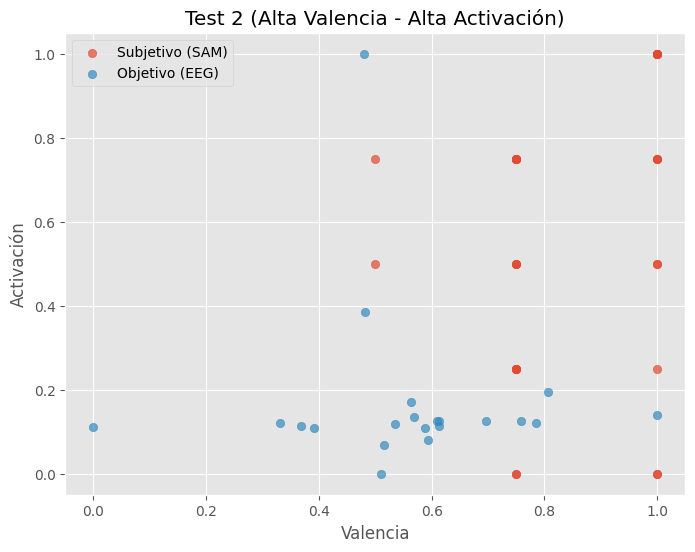

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_hh_valence'], normalized2_mk['Mk_hh_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_t2['mean_valence'], normalized_t2['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Test 2 (Alta Valencia - Alta Activación)')
plt.legend()
plt.grid(True)
plt.show()

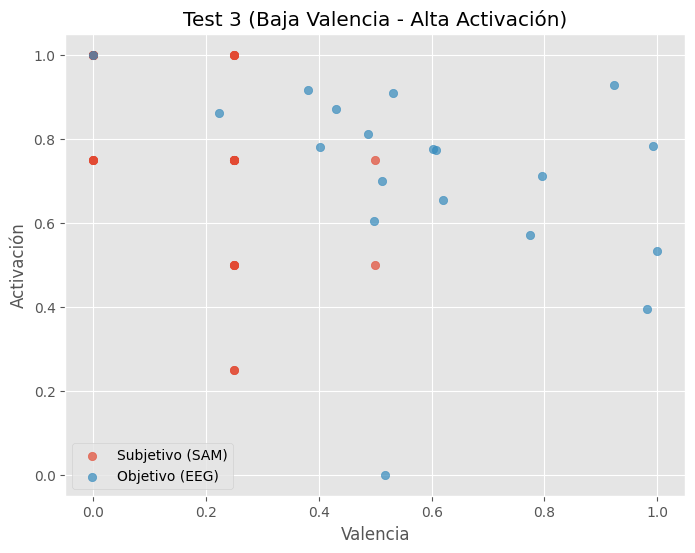

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_lh_valence'], normalized2_mk['Mk_lh_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_t3['mean_valence'], normalized_t3['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Test 3 (Baja Valencia - Alta Activación)')
plt.legend()
plt.grid(True)
plt.show()

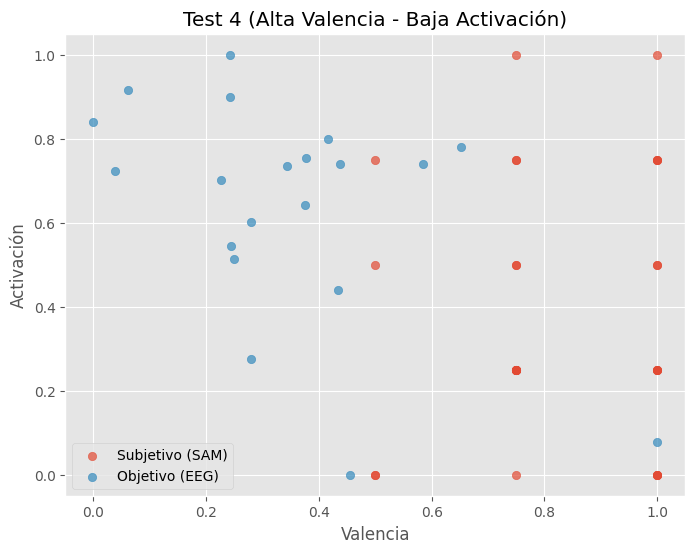

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_hl_valence'], normalized2_mk['Mk_hl_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_t4['mean_valence'], normalized_t4['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Test 4 (Alta Valencia - Baja Activación)')
plt.legend()
plt.grid(True)
plt.show()

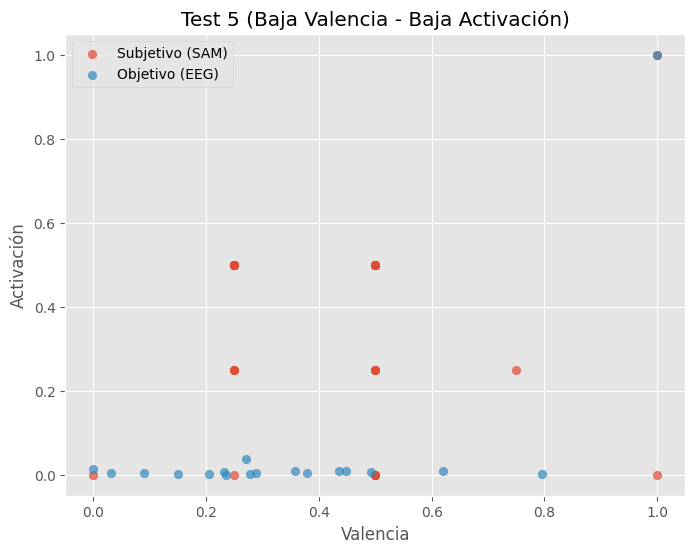

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_ll_valence'], normalized2_mk['Mk_ll_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_t5['mean_valence'], normalized_t5['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Test 5 (Baja Valencia - Baja Activación)')
plt.legend()
plt.grid(True)
plt.show()